# ITV Live Online Career Challenge

#### Challenge info -
How do ITV promote content on their new streaming platform ITVX
effectively to their viewers? <br><br>
Overview:<br>
ITV have just launched their new streaming platform ITVX and have commissioned new
shows by partnering with third parties such as Warner brothers to expand the breadth of
ITVX content and the number of hours available to watch (from 3,000 to 15,000!).<br><br>
Step Up Challenge: <br>
With an average of 30 million registered users, how can we ensure that they discover this
new great content, increase the number of hours they stay on the platform and are aware
of the new features that ITVX has to offer?<br><br>
Task :<br>
ITVX is launching a new original show every week, ‘A Spy Among Friends’ is one of the first
original shows on ITVX in 2022<br>
* Task 1 - Data Strategy<br>
  We want to know what the customer base viewing habits look like?<br><br>
* Task 2 - Data Science<br>
   Who should we be promoting this show to?<br><br>
* Based on what you have learnt, what recommendations would you give to product
and /or marketing to promote ‘Spy Amongst Friends’.

## Libraries

In [608]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math

# exploratory data analysis with Pandas Profiling
from ydata_profiling import ProfileReport

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# machine learning
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from keras.models import Sequential, Model
from keras.layers import *
from keras.metrics import *

## TASK 2 - DATA SCIENCE

For the data science task, we are looking into the **"DIG_step_up_user_data.csv"** file and the column *"any_spy_among_friends_consumption"*. We'll start off by,<br>
* Reading in the file and sniff testing the data,
* Perform data cleaning as a part of the data pre-processing stage,

### Acquire the data

In [429]:
# read in the files using pandas
df_user_data = pd.read_csv('DIG_step_up_user_data.csv').set_index('user_id')
df_user_data.head()          # display the first 5 rows of the file

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,...,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,0.000000,...,NaN,0.000000,0.000000,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,NaN


In [430]:
# shape of the file
df_user_data.shape

(1771, 30)

In [431]:
# print the file info
df_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, #ERROR! to zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   n_sessions                                     1771 non-null   int64  
 1   n_programmes_watched                           1771 non-null   int64  
 2   n_episodes_watched                             1771 non-null   int64  
 3   top_3_programmes                               1771 non-null   object 
 4   top_3_genres                                   1745 non-null   object 
 5   total_genre_comedy_consumption_seconds         1771 non-null   float64
 6   total_genre_drama_consumption_seconds          1771 non-null   float64
 7   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 8   total_genre_sport_consumption_seconds          1771 non-null   float64
 9   total_genre

In [432]:
# get the list of column headers
headers = df_user_data.columns.values
print('The list of columns in the file are :\n', headers)

The list of columns in the file are :
 ['n_sessions' 'n_programmes_watched' 'n_episodes_watched'
 'top_3_programmes' 'top_3_genres'
 'total_genre_comedy_consumption_seconds'
 'total_genre_drama_consumption_seconds'
 'total_genre_entertainment_consumption_seconds'
 'total_genre_sport_consumption_seconds'
 'total_genre_other_consumption_seconds'
 'total_genre_factual_consumption_seconds'
 'total_channel_ITV_consumption_seconds'
 'total_channel_ITV2_consumption_seconds'
 'total_channel_ITV3_consumption_seconds'
 'total_channel_ITVBe_consumption_seconds'
 'total_channel_ITV4_consumption_seconds'
 'total_watch_morning_consumption_seconds'
 'total_watch_afternoon_consumption_seconds'
 'total_watch_dinner_consumption_seconds'
 'total_watch_night_consumption_seconds'
 'total_platform_tv_consumption_seconds'
 'total_platform_mobile_consumption_seconds'
 'total_platform_desktop_consumption_seconds' 'n_devices_watched_on'
 'total_weekend_consumption_seconds' 'total_consumption_seconds'
 'any_spy_

### Data cleaning

Before we can analyze the data further, lets clean the data starting by answering some questions but before that lets create a copy of the dataframe so that we dont end up editing the original dataframe.

In [433]:
# create a copy of the dataframe
df_user_data_copy = df_user_data.copy()

**Q1) Are there empty cells or blank values for columns in the file?**

In [434]:
# check for missing values in the file
df_user_data_copy.isnull().sum()

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

We can see that there are columns in the file containing null or blank values. Let's visualise this to have a better look at all the columns with empty cells.

<AxesSubplot: >

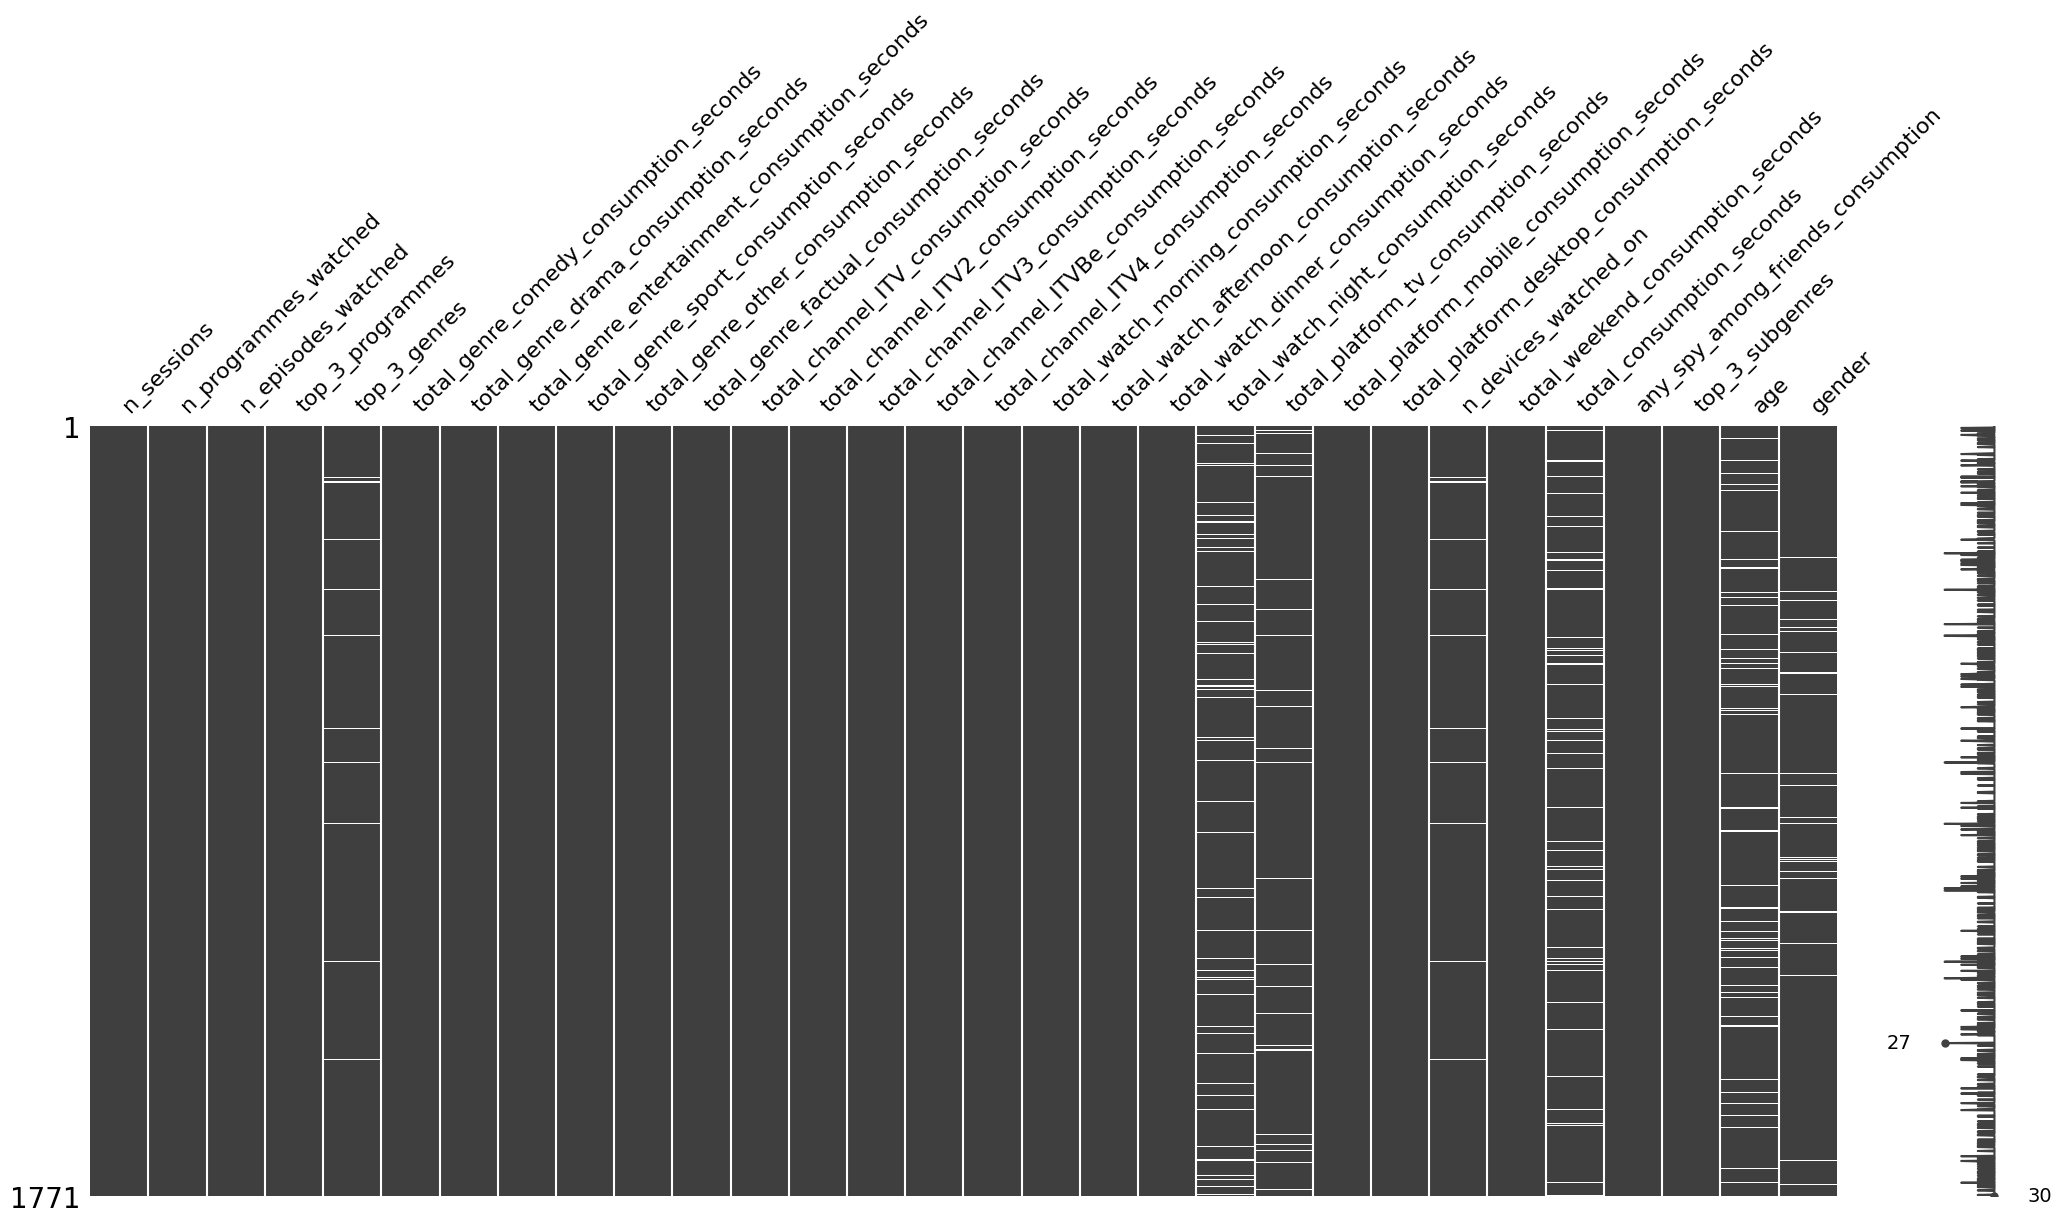

In [435]:
# missingno library allows us to check and visualise these missing values
msn.matrix(df_user_data_copy)

Text(0.5, 1.0, 'Columns with empty or blank cells')

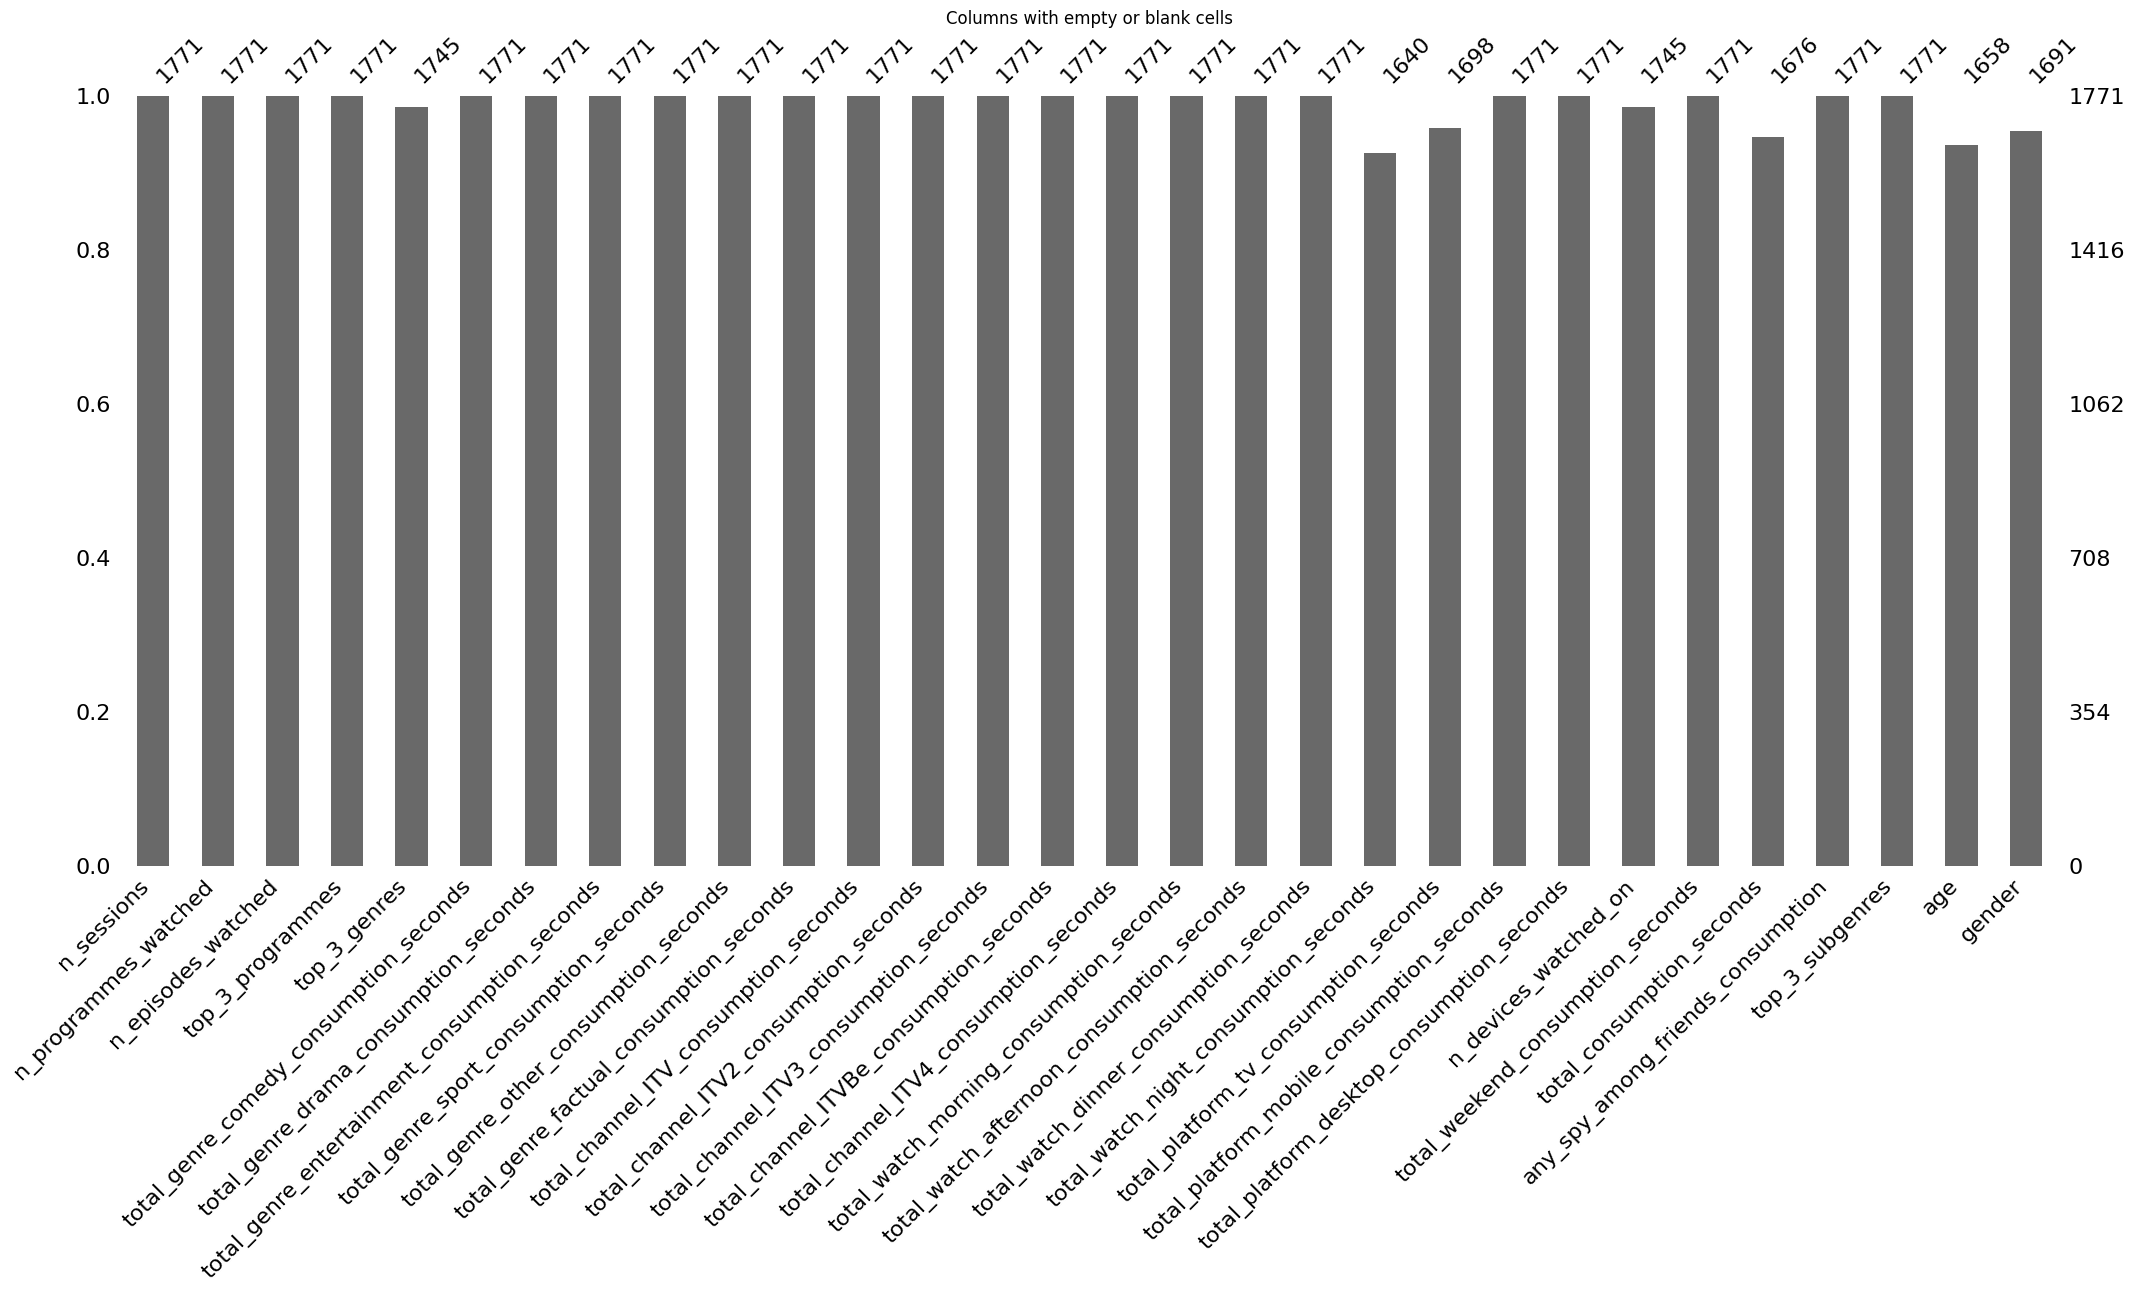

In [436]:
# lets plot a bar chart to visualise the exact count of missing data
msn.bar(df_user_data_copy)
plt.title('Columns with empty or blank cells')

Here, we can see that the following columns have empty cell values,<br>
* top_3_genres
* total_watch_night_consumption_seconds
* total_platform_tv_consumption_seconds
* n_devices_watched_on
* total_consumption_seconds
* age
* gender

Lets try to see what we can do these columns one by one.

**Column - top_3_genres**

In [437]:
# lets check the records with empty values in this column
df_user_data_copy[df_user_data_copy['top_3_genres'].isnull()]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,
34qq/LCqiErVpuyEDFyPCEPZXADC6GId0qMz3pMKXxA=,80,8,48,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...",NaN,0.000,49654.812000,59980.330000,15006.436342,0.000000,...,124641.578342,0.000000,0.000000,NaN,22137.977051,124641.578342,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
3dgSJIH2S9EWaAWspEQjzFNEXitcaHPBJev/Rwznlbk=,7,2,3,"['THE SUSPECT', 'A SPY AMONG FRIENDS']",NaN,0.000,5986.245000,0.000000,0.000000,0.000000,...,5986.245000,0.000000,0.000000,NaN,5518.333000,5986.245000,True,['CRIME AND THRILLER'],40.0,Male
3h10Tx5p163QrA1YscQPVZdHIwrpqVhLa862C8euIec=,21,10,16,"['THE VOICE', 'A SPY AMONG FRIENDS', 'DOC MART...",NaN,0.000,24543.208000,15072.229451,0.000000,24.431104,...,40144.868555,0.000000,0.000000,NaN,12131.267298,40144.868555,True,"['FAMILY', 'TALENT SHOWS', 'COMEDY']",40.0,Male
5g7WtW+iPUyZjTAqql4Kf7okijsBjqLroOgSsT7h+h4=,24,3,13,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'THE W...",NaN,0.000,22195.715000,0.000000,0.000000,0.000000,...,22195.715000,0.000000,0.000000,NaN,11110.211000,22195.715000,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",39.0,Female
8BKNX3fvY+zCTXu7yLR65HVOcEshYaU/GjvRcwhad0o=,2,1,1,['SNOOKER: CHAMPION OF CHAMPIONS'],NaN,0.000,0.000000,0.000000,4476.583000,0.000000,...,4476.583000,0.000000,0.000000,NaN,0.000000,4476.583000,False,"['EVENT', 'SNOOKER']",35.0,Male
9dHIFQkHMZ8izvhAC3QQeSkO2BCp2Rry00UmmMpzU84=,20,5,18,"['CATCHPHRASE', 'WORLD CUP', 'A SPY AMONG FRIE...",NaN,0.000,4470.305000,23878.824000,7489.603779,0.000000,...,35838.732779,0.000000,0.000000,NaN,7389.373671,35838.732779,True,"['QUIZ AND GAME SHOWS', 'FOOTBALL', 'EVENT']",31.0,Female
Cu1QB+B9jtRtzIZ9Dy2KLqib6g7cT7UXCjnip39g38E=,5,3,3,"['THIS HAPPY BREED', 'WORLD CUP', 'THIS MORNING']",NaN,0.000,0.000000,3230.999190,6023.768642,3066.987000,...,1339.491000,0.000000,10982.263832,NaN,9090.755642,NaN,False,"['SOCIAL REALISM', 'COMEDY', 'FOOTBALL']",31.0,Male
FlSztVOfjoR+cIxKZPk4ULree+SApJQSMHEj+6W39E0=,91,17,50,"['ANY HUMAN HEART', 'A CONFESSION', 'RECKLESS']",NaN,0.000,126049.945032,317.205000,0.000000,294.485000,...,126661.635032,0.000000,0.000000,NaN,26801.963000,126661.635032,True,"['CRIME AND THRILLER', 'SOCIAL DRAMA', 'BASED ...",32.0,Male
GpOjr61arLAL+9pKwVFm+G2aUo2PEIMLFuBGbb0/l2g=,28,3,10,"['WORLD CUP', 'A SPY AMONG FRIENDS', 'WITHOUT ...",NaN,0.000,20931.236000,0.000000,4845.488149,0.000000,...,NaN,0.000000,0.000000,NaN,2762.363000,25776.724149,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,Female


So there are 26 records with empty cell value in this column. Let's see if there are users in these records who watch our target show **A spy Among Friends**

In [438]:
# check the record with empty values in these columns and they watch our target show
df_user_data_copy[(df_user_data_copy['top_3_genres'].isnull()) & (df_user_data_copy['any_spy_among_friends_consumption'] == 1)].shape

(15, 30)

Since, there are 15 out out the 26 records who watch our target show, lets try to fill the values by checking their consumption time for each genre. The top 3 genres with most consumption in seconds can be taken as the user's top 3 genres.

In [439]:
genre_col_list = df_user_data_copy['top_3_genres'].values
genre_col_list

array(["['DRAMA', 'FACTUAL', 'SPORT']", "['DRAMA']",
       "['ENTERTAINMENT', 'SPORT', 'DRAMA']", ...,
       "['ENTERTAINMENT', 'DRAMA', 'SPORT']",
       "['SPORT', 'ENTERTAINMENT', 'COMEDY']", "['ENTERTAINMENT']"],
      dtype=object)

In [440]:
# genres consumption columns list
genres_consumption_cols = [col for col in df_user_data_copy.columns.values if 'total_genre' in col]

In [441]:
# function to generate top 3 genres based on consumption time
def top_3_genre_picker(i):

    consumption_col_list = []
    row = df_user_data_copy.iloc[i][genres_consumption_cols]
    
    # sort the row
    row.sort_values(ascending=False, inplace=True)

    if row[0] > 0:
        genre = row.index[0].split('_')[2].upper()
        consumption_col_list.append(genre)
    elif row[1] > 0:
        genre = row.index[1].split('_')[2].upper()
        consumption_col_list.append(genre)
    elif row[2] > 0:
        genre = row.index[2].split('_')[2].upper()
        consumption_col_list.append(genre)
    
    # return the list
    return consumption_col_list

In [442]:
# iterate through the series values and replace the nan values with the user's top 3 genres
for i, item in enumerate(genre_col_list):
    if type(item) == type(np.nan):
        genre_col_list[i] = top_3_genre_picker(i)
genre_col_list = genre_col_list.tolist()

In [443]:
# update the series with the replaced values
df_user_data_copy['top_3_genres'] = genre_col_list

**Column - total_watch_night_consumption_seconds**

In [444]:
cols = [
    'total_genre_comedy_consumption_seconds',
    'total_genre_drama_consumption_seconds',
    'total_genre_entertainment_consumption_seconds',
    'total_genre_sport_consumption_seconds',
    'total_genre_other_consumption_seconds',
    'total_genre_factual_consumption_seconds',
    'total_watch_morning_consumption_seconds',
    'total_watch_afternoon_consumption_seconds',
    'total_watch_dinner_consumption_seconds',
    'total_watch_night_consumption_seconds',
    'total_weekend_consumption_seconds',
    'total_platform_tv_consumption_seconds',
    'total_platform_mobile_consumption_seconds',
    'total_platform_desktop_consumption_seconds',
    'total_consumption_seconds',
    'any_spy_among_friends_consumption'
]

In [445]:
# get the records with nan values in total_watch_night_consumption_seconds
df_user_data_copy[df_user_data_copy['total_watch_night_consumption_seconds'].isnull()][cols]

,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_weekend_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption
user_id,,,,,,,,,,,,,,,,
+PDN5TuwsCX8wkJn7zYn8Xuam7dH4MNfeywFIX53f80=,0.0,37373.85100,0.000000,0.000000,48.108000,0.000,4779.086,24677.723000,5628.539000,NaN,6708.169000,37421.959000,0.000000,0.000000,37421.959000,True
/CDTrXH8t16xrm7L9F6X4CIhyMETplvUMldInRinFlI=,0.0,0.00000,5288.987421,0.000000,0.000000,0.000,0.000,0.000000,0.000000,NaN,0.000000,0.000000,2741.635910,2547.351511,5288.987421,False
/F+Ht+XG55kwVP9ttZqY+kut+3Ue3X1wueG8b5tcfyU=,0.0,0.00000,0.000000,0.000000,3.571327,3995.445,2724.964,0.000000,1270.481000,NaN,3.571327,0.000000,3999.016327,0.000000,3999.016327,False
/hZSighcywFQ1WEqjiEpKg57I/hNyPPM7dMLrKOuh4c=,0.0,20847.11800,0.000000,140.259947,2263.839000,732.001,0.000,0.000000,7784.517000,NaN,10208.894000,23983.217947,0.000000,0.000000,23983.217947,True
1wskT7HC25JSTWoMK5s2XaF7cCVPcwWrDemj1gZX/Qs=,0.0,0.00000,3240.271000,0.000000,0.000000,0.000,0.000,251.244000,0.000000,NaN,3240.271000,0.000000,3240.271000,0.000000,3240.271000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xihzk7Hgdw321H+0WWhW/s5ia7o3N8AHMJ8Yij8TXoA=,0.0,5699.12700,3923.208780,75893.986368,0.000000,4608.001,0.000,19197.485481,70926.837667,NaN,36022.664074,90124.323148,0.000000,0.000000,90124.323148,True
yDNy8VlNHGmSk1IdS/Pi8UdFOKj70WcX6YdPWoATh38=,0.0,11169.83900,28110.277464,43550.606959,1110.334781,0.000,2988.815,15857.979349,61556.786642,NaN,29746.220056,69712.198196,14228.860009,0.000000,83941.058204,True
ye6KTgVOWDqZoXwuZzjWQWjcTcKIupo8FHGv3z1hqqs=,0.0,41820.61421,13988.254000,0.000000,3217.794000,0.000,11071.890,5716.912000,29809.671210,NaN,18531.377000,59026.662210,0.000000,0.000000,59026.662210,True


Using the total_consumption column, lets try to fill up the total_watch_night_consumption_seconds column

In [446]:
# get the series values in array
consumption_col_list = df_user_data_copy['total_watch_night_consumption_seconds'].values
consumption_col_list

array([9.09718000e+03, 0.00000000e+00, 1.35712931e+04, ...,
       2.83686405e+04, 2.30633782e+01, 0.00000000e+00])

In [447]:
# function to replace the nan values with the remaining seconds from the total_consumption_seconds colum in the total_watch_night_consumption_seconds
def total_watch_night_fillna(i):
    
    # get the total consumption seconds for a particular record at position i
    row = df_user_data_copy.iloc[i][cols]
    total_watch_night_consumption_seconds = row['total_consumption_seconds'] - (row['total_watch_morning_consumption_seconds'] + row['total_watch_afternoon_consumption_seconds'] + row['total_watch_dinner_consumption_seconds'])
    
    return total_watch_night_consumption_seconds

In [448]:
# iterate through the series values and replace the nan values with the remaining seconds for the night from the total_consumption_seconds column
for i, item in enumerate(consumption_col_list):
    if math.isnan(item):
        consumption_col_list[i] = total_watch_night_fillna(i)
consumption_col_list = consumption_col_list.tolist()

In [449]:
# update the series with replaced values
df_user_data_copy['total_watch_night_consumption_seconds'] = consumption_col_list

In [450]:
# check if all the nan values were replaced
df_user_data_copy[df_user_data_copy['total_watch_night_consumption_seconds'].isnull()][cols]

,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_weekend_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption
user_id,,,,,,,,,,,,,,,,
PDaaW6XJZgAW7Y1loq0wuvjXdiZyC7C25VeOS3pe16E=,0.000,0.00000,3760.454000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,NaN,0.000000,0.000000,3760.454000,0.000000,NaN,False
WZ/omiiy3M9BOMWcMn5M/DWr6/6wAxIe2XKQO2mFNTw=,1215.086,4394.99100,0.000000,0.000000,0.000000,0.000000,2440.123,1954.868,1215.086000,NaN,5610.077000,5610.077000,0.000000,0.000000,NaN,False
g1Jm/Ud995MNxTVtWe62mtyTabS0HxBc+uVgRfqugp0=,0.000,7103.45858,0.000000,3065.419767,0.000000,0.000000,0.000,3584.012,6584.866347,NaN,7074.413000,10168.878347,0.000000,0.000000,NaN,True
gxuC6QVvV+qXdvXW/S0Uj0UMnJOZY7w+2l4mYg/2DE4=,0.000,28274.22600,0.000000,0.000000,0.000000,0.000000,0.000,0.000,5890.805000,NaN,19824.061000,28274.226000,0.000000,0.000000,NaN,True
hQfVRkfcBMv2NwRwuY0xEAKA3T7S0w+rtGoFBqJrvhs=,0.000,28138.13100,2001.560000,0.000000,0.000000,2695.800000,0.000,3141.280,23060.560000,NaN,14454.080000,NaN,0.000000,0.000000,NaN,True
heOutPC0Bvx29eWPfYNFKvV5tPiTvomNDPS5aA/p8lo=,0.000,3280.81900,0.000000,55.671855,0.000000,4142.414000,0.000,2888.375,1309.710855,NaN,4142.414000,7478.904855,0.000000,0.000000,NaN,True
kLO90ji7do1s2FHR7f+4rJUanDXpzumTbzfZP0dJtDo=,0.000,0.00000,50.090933,0.000000,0.000000,0.000000,0.000,0.000,50.090933,NaN,50.090933,50.090933,0.000000,0.000000,NaN,False
ldEPB7Pn3QkhjFPa3TSTNSZo1B1EEvy8Yu/0yTqH85k=,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,False
qZl3KqURuFLB0ywfzRO2TS1iUoyBY2nqFkw3XtBAkUs=,0.000,0.00000,0.000000,5883.067650,3.613029,0.000000,0.000,0.000,5886.680679,NaN,5883.067650,0.000000,3.613029,5883.067650,NaN,False


Here, we can we see that some values for total_watch_night_consumption_seconds were not replaced because the corresponding total_consumption_seconds values are also nan.
Since, total_consumption_seconds is essential the combination of all the genre consumption columns, lets fill the total_consumption_seconds now and then replace the remaining total_watch_night_consumption_seconds values.

**Column - total_consumption_seconds**

In [451]:
# get the records with nan values in total_consumption_seconds
df_user_data_copy[df_user_data_copy['total_consumption_seconds'].isnull()][cols]

,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_weekend_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption
user_id,,,,,,,,,,,,,,,,
+gpq8zG5ezcYspzZsez6P7eUoISsmL1mKAr9AtskpNE=,0.000,8730.206000,247.360517,0.000000,6435.461000,0.000000,522.193000,247.360517,1298.330000,13345.144000,522.193000,NaN,0.000000,0.0,NaN,True
/8MnVTgFJXXXOm/FCjmGb9jwX6IUlHEUWbR1oPuWH4U=,0.000,46262.540589,110850.099238,88380.241102,21744.300105,2888.841908,91552.036703,30909.008214,90140.070422,57524.907602,42881.076734,270126.022941,0.000000,0.0,NaN,True
/YCWgzSoqnYDJ650wYy6eXl8GgW6g9h2WyDR5YX1554=,514.962,119048.373214,100335.538000,9.070761,0.000000,5797.001116,0.000000,9531.373000,189624.533975,26549.038116,71167.857214,225704.945091,0.000000,0.0,NaN,True
/fODD3U3QHz/fwU3HRSKUdhY1/jc2kLlP0mnlJNwcpk=,0.000,5262.408533,26151.207961,0.000000,0.000000,0.000000,328.683000,19194.992515,11548.858533,341.082446,7479.090446,0.000000,31413.616494,0.0,NaN,False
1cmcFtdPP5yV6R611RnBQoE5/NQsb1+uf4/mJ4TbhDk=,0.000,0.000000,4169.332000,0.000000,946.987000,5.566379,0.000000,0.000000,4770.076379,351.809000,1049.582000,5121.885379,0.000000,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uUPLzdbDaO/NLjy99+2cWZ+V9imuJr1oUwRkMWXiBxI=,0.000,34050.833000,7437.799000,0.000000,0.000000,0.000000,12489.781000,14174.914000,10224.425000,4599.512000,16161.007000,34908.906000,6579.726000,0.0,NaN,False
vEgjXF1bN07lh0nR38+fDyjMxrQvJFgmZGPS7EE4H8Q=,0.000,0.000000,0.000000,48949.509254,0.000000,0.000000,0.000000,6801.627227,42147.882027,0.000000,13960.046727,48949.509254,0.000000,0.0,NaN,False
wI1IWe4Ss+VeZlLG6nRPAIm2uVUgoz2EGX88KDp0L38=,11.000,309996.393771,21977.980000,0.000000,4883.000000,0.000000,131977.758448,65019.335000,139871.280323,0.000000,94148.473448,336868.373771,0.000000,0.0,NaN,True


In [452]:
consumption_col_list = df_user_data_copy['total_consumption_seconds'].values
consumption_col_list

array([100236.78670749,  10650.877     ,  52660.12492083, ...,
        56815.31021002,             nan,  25568.528     ])

In [453]:
# function to replace the nan values in total_consumption_seconds column
def total_consumption_seconds_fillna(i):

    row = df_user_data_copy.iloc[i][cols]
    total_consumption_seconds = row['total_genre_comedy_consumption_seconds'] + row['total_genre_drama_consumption_seconds'] + row['total_genre_entertainment_consumption_seconds'] + row['total_genre_sport_consumption_seconds'] + row['total_genre_other_consumption_seconds'] + row['total_genre_factual_consumption_seconds']

    return total_consumption_seconds

In [454]:
# iterate through the series values and replace the nan values 
for i, item in enumerate(consumption_col_list):
    if math.isnan(item):
        consumption_col_list[i] = total_consumption_seconds_fillna(i)
consumption_col_list = consumption_col_list.tolist()

In [455]:
# update the series with replaced values
df_user_data_copy['total_consumption_seconds'] = consumption_col_list

Now that we have replaced the nan values in the total_consumption_seconds column, we can go back and replace the remaining nan values in the total_watch_night_consumption_seconds.

**Column - total_watch_night_consumption_seconds**

In [456]:
# get the series values in array
consumption_col_list = df_user_data_copy['total_watch_night_consumption_seconds'].values
consumption_col_list

array([9.09718000e+03, 0.00000000e+00, 1.35712931e+04, ...,
       2.83686405e+04, 2.30633782e+01, 0.00000000e+00])

In [457]:
# iterate through the series values again and replace the remaining nan values with the remaining seconds for the night from the total_consumption_seconds column
for i, item in enumerate(consumption_col_list):
    if math.isnan(item):
        consumption_col_list[i] = total_watch_night_fillna(i)
consumption_col_list = consumption_col_list.tolist()

In [458]:
# update the series with replaced values
df_user_data_copy['total_watch_night_consumption_seconds'] = consumption_col_list

**Column - total_platform_tv_consumption_seconds**

In [459]:
# get the records with nan values in total_platform_tv_consumption_seconds
df_user_data_copy[df_user_data_copy['total_platform_tv_consumption_seconds'].isnull()][cols]

,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_weekend_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption
user_id,,,,,,,,,,,,,,,,
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,0.0,17670.600000,11802.851738,144107.089606,0.000000,3408.626,18512.082654,25081.574436,108080.543233,25314.967021,70648.591664,NaN,0.0,0.0,176989.167344,True
+gpq8zG5ezcYspzZsez6P7eUoISsmL1mKAr9AtskpNE=,0.0,8730.206000,247.360517,0.000000,6435.461000,0.000,522.193000,247.360517,1298.330000,13345.144000,522.193000,NaN,0.0,0.0,15413.027517,True
/09nMUVrgZYr1XP3hdR442k8nui5xd0oWBLhDdeCLAw=,0.0,12362.023000,0.000000,579.084754,0.000000,0.000,1365.575000,4167.084000,720.241754,6688.207000,1303.964000,NaN,0.0,0.0,12941.107754,True
/2QvLMO9h/46HxULonY/aJuIDnznsxcntK6Wp4+iD6U=,0.0,9776.657000,4354.497792,33876.950033,0.000000,0.000,0.000000,7868.337350,37007.559475,3132.208000,2117.430000,NaN,0.0,0.0,48008.104825,True
/AuEBXD9lpplBXtrGjzjavr6vrOzXxdrAZgDm41C3Es=,0.0,0.000000,8632.059000,0.000000,0.000000,0.000,0.000000,2699.510000,5932.549000,0.000000,8632.059000,NaN,0.0,0.0,8632.059000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wCDIDOEG5pvaqD++23/HrEcglz46J4UzDd0XSiL/3Qo=,0.0,0.000000,2878.664000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,2878.664000,464.097000,NaN,0.0,0.0,2878.664000,False
wvt9VfiRFbEsA/WrZtGCJNXf+CMC9dxuGF/f/HUW2/g=,0.0,80597.328000,14281.680000,0.000000,0.000000,0.000,1313.880000,0.000000,43676.391000,49888.737000,25863.888000,NaN,0.0,0.0,94879.008000,False
yUZ9Cwa+cmnCZictWYtmOd6SxJgAwm4CSW09aSO4cuk=,0.0,3536.750965,16592.048151,42529.109172,17175.024378,0.000,8861.367477,14023.080265,44633.868825,12314.616100,30635.070330,NaN,0.0,0.0,79832.932667,True


In [460]:
consumption_col_list = df_user_data_copy['total_platform_tv_consumption_seconds'].values

In [461]:
# function to replace the nan values in total_platform_tv_consumption_seconds from total_consumption_seconds
def total_platform_tv_consumption_seconds_fillna(i):

    row = df_user_data_copy.iloc[i][cols]
    total_platform_tv_consumption_seconds = row['total_consumption_seconds'] - (row['total_platform_mobile_consumption_seconds'] + row['total_platform_desktop_consumption_seconds'])

    return total_platform_tv_consumption_seconds

In [462]:
# iterate through the series values and replace the nan values with the remaining seconds for the platform from the total_consumption_seconds column
for i, item in enumerate(consumption_col_list):
    if math.isnan(item):
        consumption_col_list[i] = total_platform_tv_consumption_seconds_fillna(i)
consumption_col_list = consumption_col_list.tolist()

In [463]:
# update the series with replaced values
df_user_data_copy['total_platform_tv_consumption_seconds'] = consumption_col_list

**Column - n_devices_watched_on**

For filling the n_devices_watched_on columns, we can check if the user's consumption values across **total_platform_tv_consumption_seconds**, **total_platform_mobile_consumption_seconds** and **total_platform_desktop_consumption_seconds** and assign a minimum value accordingingly if they have used 1 of the 3 platforms.

In [464]:
df_user_data_copy['n_devices_watched_on'].value_counts()

1.0     1118
2.0      496
3.0      115
4.0       12
6.0        2
10.0       1
5.0        1
Name: n_devices_watched_on, dtype: int64

In [465]:
n_devices_watched_on_list = df_user_data_copy['n_devices_watched_on'].values

In [466]:
# get the records where n_devices_watched_on has nan values
df_user_data_copy[df_user_data_copy['n_devices_watched_on'].isnull()].shape

(26, 30)

In [467]:
# function to replace the nan values in n_devices_watched_on for record at position i
def n_devices_watched_on_fillna(i):

    row = df_user_data_copy.iloc[i][cols]
    n_devices_watched_on = 0
    
    if row['total_platform_tv_consumption_seconds'] > 0:
        n_devices_watched_on += 1
    
    if row['total_platform_mobile_consumption_seconds'] > 0:
        n_devices_watched_on += 1

    if row['total_platform_desktop_consumption_seconds'] > 0:
        n_devices_watched_on += 1

    return n_devices_watched_on

In [468]:
# iterate through the series values and replace the nan values with the remaining seconds for the platform from the total_consumption_seconds column
for i, item in enumerate(n_devices_watched_on_list):
    if math.isnan(item):
        n_devices_watched_on_list[i] = n_devices_watched_on_fillna(i)
n_devices_watched_on_list = n_devices_watched_on_list.tolist()

In [469]:
# update the series with replaced values
df_user_data_copy['n_devices_watched_on'] = n_devices_watched_on_list

In [470]:
# get the records where n_devices_watched_on has nan values
df_user_data_copy[df_user_data_copy['n_devices_watched_on'].isnull()].shape

(0, 30)

**Column - age**

As for the **age** column, we can try and replace the nan values with the mean age.

In [471]:
# get the records where age column has nan values
df_user_data_copy[df_user_data_copy['age'].isnull()]

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,
/Q+yM3fqOc/hRjA5Hcm4lNst+vtkZsVd3cZqTRm1HXk=,309,26,200,"['EMMERDALE', 'CORONATION STREET', 'UNFORGOTTEN']","['DRAMA', 'ENTERTAINMENT', 'FACTUAL']",0.000,539554.314080,4245.746376,0.000000,2588.532000,...,550975.818654,0.000,0.000,2.0,125724.511242,550975.818654,True,"['LONG RUNNING DRAMA', 'CRIME AND THRILLER', '...",NaN,Prefer not to answer
/RYxwLoqfER5DCwozZwEzctBMWsdA+XBJaK0sMxQtHU=,3,2,3,"['A SPY AMONG FRIENDS', 'MINDER']",['DRAMA'],0.000,3342.875000,0.000000,0.000000,0.000000,...,3342.875000,0.000,0.000,1.0,17.114000,3342.875000,True,"['CRIME AND THRILLER', 'COMEDY']",NaN,Prefer not to answer
/kfwr93GR8LVmgwyXNDEAuV63VaPG2afos27E60g5uA=,89,10,52,"['CORONATION STREET', 'RICHES', 'THE REUNION']","['DRAMA', 'OTHER', 'FACTUAL']",0.000,63684.033000,0.000000,0.000000,11026.964000,...,36207.617000,0.000,38503.380,2.0,12657.264000,74710.997000,True,"['LONG RUNNING DRAMA', 'DRAMA', 'THRILLER']",NaN,Prefer not to answer
0/EP04h/g6kCUjAXnBnfS4JqLLTGX3Dc9JP3OWMpZm0=,3,1,1,['A SPY AMONG FRIENDS'],['DRAMA'],0.000,1397.119000,0.000000,0.000000,0.000000,...,1397.119000,0.000,0.000,1.0,0.000000,1397.119000,True,['CRIME AND THRILLER'],NaN,Male
0uERJ2pTdYeqygC8tRYlbcGZYlyPvqlbXNwMly62JM0=,2,1,2,['CORONATION STREET'],['DRAMA'],0.000,1344.234000,0.000000,0.000000,0.000000,...,0.000000,1344.234,0.000,1.0,0.000000,1344.234000,False,['LONG RUNNING DRAMA'],NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uOwnCanBqH1oBt/iQKCTrql0WIiW0oLbzxJ1bx2ywYE=,7,3,6,"['DOC MARTIN', 'STONEHOUSE', 'A SPY AMONG FRIE...",['DRAMA'],0.000,12586.223000,0.000000,0.000000,0.000000,...,12586.223000,0.000,0.000,1.0,0.000000,12586.223000,True,"['COMEDY', 'MEDICAL', 'CRIME']",NaN,Female
wRNHFN47ZIRFTxdF7ehq10uwD/Hgpw0Zb566wgYzhFc=,6,5,6,"['LINGO', 'BAD GIRLS', 'STONEHOUSE']","['ENTERTAINMENT', 'DRAMA']",0.000,294.579000,7350.609000,0.000000,0.000000,...,7645.188000,0.000,0.000,1.0,0.000000,7645.188000,False,"['ENTERTAINMENT', 'CELEBRITY', 'QUIZ AND GAME ...",NaN,Male
wktZpEPWz24Y1LLwwuET2QeTu0t+/3AWs2Uu2NyRcsI=,7,1,7,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""]",['ENTERTAINMENT'],0.000,0.000000,23718.351000,0.000000,0.000000,...,0.000000,0.000,23718.351,1.0,7409.542000,23718.351000,False,['CELEBRITY'],NaN,Female


In [472]:
# get the mean age of the users using the service
age_mean = df_user_data_copy['age'].mean()
age_mean

34.93908323281062

In [473]:
# replace the nan values in age column with the mean age using fillna 
df_user_data_copy['age'] = df_user_data_copy['age'].fillna(age_mean)

In [474]:
# get the records where age column has nan values
df_user_data_copy[df_user_data_copy['age'].isnull()].shape

(0, 30)

**Column - gender**

Lets plot a bar chart to see the gender distribution.

In [475]:
df_user_data_copy['gender'].value_counts()

Male                    671
Female                  665
Prefer not to answer    276
Other                    79
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution plot')

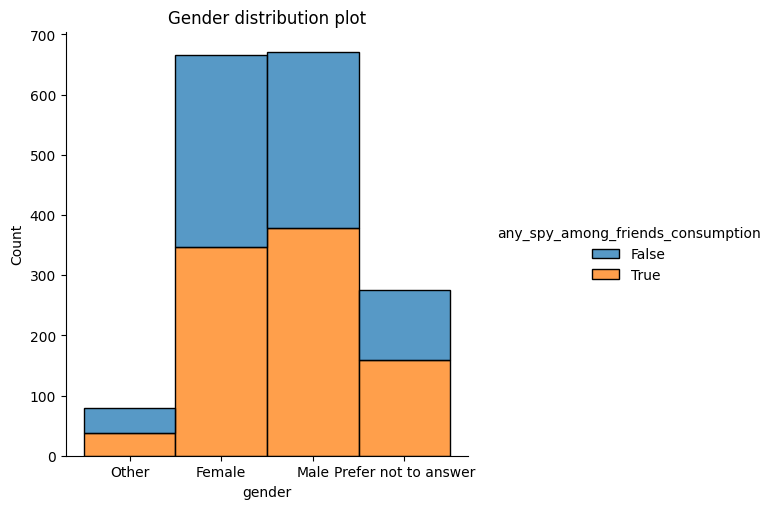

In [476]:
# plot the distribution 
sns.displot(data=df_user_data_copy, x='gender', hue='any_spy_among_friends_consumption', multiple='stack')
plt.title('Gender distribution plot')

In [477]:
# get the records where gender column has nan values
df_user_data_copy[df_user_data_copy['gender'].isnull()].shape

(80, 30)

We can replace the nan values with the most frequently occuring gender option.

In [478]:
df_user_data_copy['gender'] = df_user_data_copy['gender'].fillna(df_user_data_copy['gender'].value_counts().idxmax())

In [479]:
# get the records where gender column has nan values
df_user_data_copy[df_user_data_copy['gender'].isnull()].shape

(0, 30)

Lets plot the gender distibution again to the see the difference

Text(0.5, 1.0, 'Gender distribution plot')

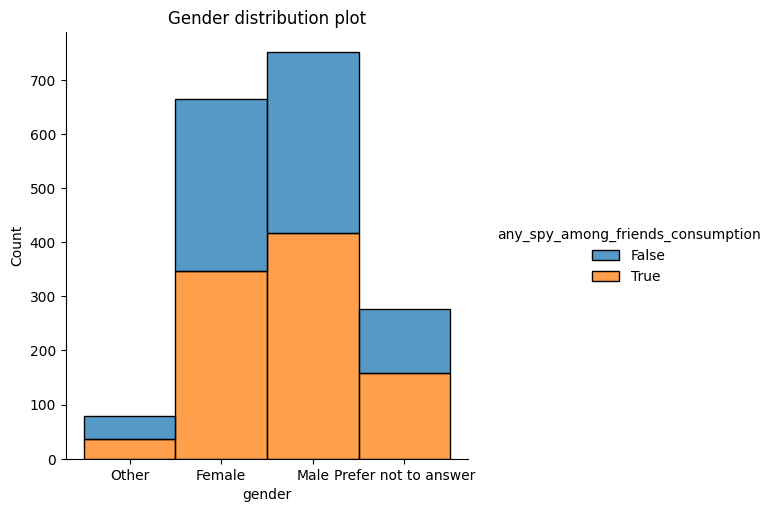

In [480]:
# plot the distribution 
sns.displot(data=df_user_data_copy, x='gender', hue='any_spy_among_friends_consumption', multiple='stack')
plt.title('Gender distribution plot')

**Q2) Are there columns with incorrect data types?** <br>
From the file info, we could see that there are columns with incorrect data types.


In [481]:
df_user_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, #ERROR! to zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   n_sessions                                     1771 non-null   int64  
 1   n_programmes_watched                           1771 non-null   int64  
 2   n_episodes_watched                             1771 non-null   int64  
 3   top_3_programmes                               1771 non-null   object 
 4   top_3_genres                                   1771 non-null   object 
 5   total_genre_comedy_consumption_seconds         1771 non-null   float64
 6   total_genre_drama_consumption_seconds          1771 non-null   float64
 7   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 8   total_genre_sport_consumption_seconds          1771 non-null   float64
 9   total_genre

Let's start with the **Age** column, convert the column to integer type.

In [482]:
# change the data type of age column
df_user_data_copy['age'] = df_user_data_copy['age'].astype(int)

In [483]:
df_user_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1771 entries, #ERROR! to zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   n_sessions                                     1771 non-null   int64  
 1   n_programmes_watched                           1771 non-null   int64  
 2   n_episodes_watched                             1771 non-null   int64  
 3   top_3_programmes                               1771 non-null   object 
 4   top_3_genres                                   1771 non-null   object 
 5   total_genre_comedy_consumption_seconds         1771 non-null   float64
 6   total_genre_drama_consumption_seconds          1771 non-null   float64
 7   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 8   total_genre_sport_consumption_seconds          1771 non-null   float64
 9   total_genre

In [484]:
df_user_data_copy.head()

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30,Other
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33,Female
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33,Male
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,...,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36,Prefer not to answer
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,0.000000,...,176989.167344,0.000000,0.000000,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32,Male


Lets also convert the **gender** column to a categorical type

In [485]:
# convert the gender column to a categorical object
df_user_data_copy['gender'] = pd.Categorical(df_user_data_copy['gender'])
df_user_data_copy['gender'].value_counts()

Male                    751
Female                  665
Prefer not to answer    276
Other                    79
Name: gender, dtype: int64

In [486]:
df_user_data_copy['gender_code'] = df_user_data_copy['gender'].cat.codes
df_user_data_copy['gender_code'].value_counts()

1    751
0    665
3    276
2     79
Name: gender_code, dtype: int64

Our target column **any_spy_among_friends_consumption** is of Boolean type, in order to pass it through our classifier model later on, we need to encode the column.

In [487]:
# show the column
df_user_data_copy['any_spy_among_friends_consumption']

user_id
#ERROR!                                          True
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=     True
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=     True
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=     True
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=     True
                                                ...  
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=     True
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=    False
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    False
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=    False
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    False
Name: any_spy_among_friends_consumption, Length: 1771, dtype: bool

In [488]:
# change the data type to int
df_user_data_copy['any_spy_among_friends_consumption'] = df_user_data_copy['any_spy_among_friends_consumption'].astype(int)

In [489]:
# show the column
df_user_data_copy['any_spy_among_friends_consumption']

user_id
#ERROR!                                         1
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=    1
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=    1
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=    1
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=    1
                                               ..
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=    1
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=    0
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    0
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=    0
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    0
Name: any_spy_among_friends_consumption, Length: 1771, dtype: int32

### Standardise the data

Refering the methods used in the starter notebook, we can standardise the consumption columns for now

In [490]:
# create the copy of the clean dataframe
df_user_data_std = df_user_data_copy.copy()
df_user_data_std.shape

(1771, 31)

In [491]:
df_user_data_std.columns.values

array(['n_sessions', 'n_programmes_watched', 'n_episodes_watched',
       'top_3_programmes', 'top_3_genres',
       'total_genre_comedy_consumption_seconds',
       'total_genre_drama_consumption_seconds',
       'total_genre_entertainment_consumption_seconds',
       'total_genre_sport_consumption_seconds',
       'total_genre_other_consumption_seconds',
       'total_genre_factual_consumption_seconds',
       'total_channel_ITV_consumption_seconds',
       'total_channel_ITV2_consumption_seconds',
       'total_channel_ITV3_consumption_seconds',
       'total_channel_ITVBe_consumption_seconds',
       'total_channel_ITV4_consumption_seconds',
       'total_watch_morning_consumption_seconds',
       'total_watch_afternoon_consumption_seconds',
       'total_watch_dinner_consumption_seconds',
       'total_watch_night_consumption_seconds',
       'total_platform_tv_consumption_seconds',
       'total_platform_mobile_consumption_seconds',
       'total_platform_desktop_consumption_seco

In [492]:
# standarise the genre consumption column
df_user_data_std['prop_genre_comedy_consumption'] = df_user_data_std['total_genre_comedy_consumption_seconds'] / df_user_data_std['total_consumption_seconds']
df_user_data_std['prop_genre_drama_consumption'] = df_user_data_std['total_genre_drama_consumption_seconds'] / df_user_data_std['total_consumption_seconds']
df_user_data_std['prop_genre_entertainment_consumption'] = df_user_data_std['total_genre_entertainment_consumption_seconds'] / df_user_data_std['total_consumption_seconds']
df_user_data_std['prop_genre_sport_consumption'] = df_user_data_std['total_genre_sport_consumption_seconds'] / df_user_data_std['total_consumption_seconds']
df_user_data_std['prop_genre_other_consumption'] = df_user_data_std['total_genre_other_consumption_seconds'] / df_user_data_std['total_consumption_seconds']
df_user_data_std['prop_genre_factual_consumption'] = df_user_data_std['total_genre_factual_consumption_seconds'] / df_user_data_std['total_consumption_seconds']

### Feature Engineering

Refering the starter notebook, we can extract the top genre from the top_3_genre column.

In [493]:
# extract the top genre from the top_3_genre column
df_user_data_std['top_genre'] = df_user_data['top_3_genres'].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
df_user_data_std['top_genre']

user_id
#ERROR!                                                 DRAMA
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=            DRAMA
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=    ENTERTAINMENT
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=            DRAMA
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=            SPORT
                                                    ...      
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=            SPORT
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=    ENTERTAINMENT
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    ENTERTAINMENT
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=            SPORT
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    ENTERTAINMENT
Name: top_genre, Length: 1771, dtype: object

In [514]:
# features and target column
features = [
    'n_sessions',
    'n_programmes_watched',
    'n_episodes_watched',
    'prop_genre_comedy_consumption',
    'prop_genre_drama_consumption',
    'prop_genre_entertainment_consumption',
    'prop_genre_sport_consumption',
    'prop_genre_other_consumption',
    'prop_genre_factual_consumption',
    'total_consumption_seconds',
    'top_genre',
    'age',
    'gender_code'
]

In [525]:
df_features_one_hot_encoded = pd.get_dummies(df_user_data_std[features], columns=['top_genre'])
df_features_one_hot_encoded

,n_sessions,n_programmes_watched,n_episodes_watched,prop_genre_comedy_consumption,prop_genre_drama_consumption,prop_genre_entertainment_consumption,prop_genre_sport_consumption,prop_genre_other_consumption,prop_genre_factual_consumption,total_consumption_seconds,age,gender_code,top_genre_COMEDY,top_genre_DRAMA,top_genre_ENTERTAINMENT,top_genre_FACTUAL,top_genre_OTHER,top_genre_SPORT
user_id,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,0.000000,0.446351,0.147071,0.217622,0.037372,0.151585,100236.786707,30,2,0,1,0,0,0,0
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10650.877000,33,0,0,1,0,0,0,0
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,0.001236,0.231468,0.213286,0.554010,0.000000,0.000000,52660.124921,33,1,0,0,1,0,0,0
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,0.000000,0.996292,0.003648,0.000000,0.000059,0.000000,78485.442042,36,3,0,1,0,0,0,0
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,0.000000,0.099840,0.066687,0.814214,0.000000,0.019259,176989.167344,32,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,10,18,0.000000,0.479462,0.173494,0.347045,0.000000,0.000000,37779.834473,33,1,0,0,0,0,0,1
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,2,12,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22751.175730,40,1,0,0,1,0,0,0
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,61,19,43,0.000000,0.007996,0.798437,0.080643,0.112175,0.000750,56815.310210,38,3,0,0,1,0,0,0


In [526]:
df_features_one_hot_encoded['any_spy_among_friends_consumption'] = df_user_data_std['any_spy_among_friends_consumption']

In [527]:
corr = df_features_one_hot_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,n_sessions,n_programmes_watched,n_episodes_watched,prop_genre_comedy_consumption,prop_genre_drama_consumption,prop_genre_entertainment_consumption,prop_genre_sport_consumption,prop_genre_other_consumption,prop_genre_factual_consumption,total_consumption_seconds,age,gender_code,top_genre_COMEDY,top_genre_DRAMA,top_genre_ENTERTAINMENT,top_genre_FACTUAL,top_genre_OTHER,top_genre_SPORT,any_spy_among_friends_consumption
n_sessions,1.000000,0.702575,0.909351,-0.029420,0.062823,-0.034232,-0.030490,-0.007445,-0.012053,0.882238,0.000474,-0.006757,-0.027023,0.088117,-0.025690,-0.048054,-0.047339,-0.040971,0.274732
n_programmes_watched,0.702575,1.000000,0.824703,-0.018796,-0.072985,0.023077,0.017178,0.094808,0.040301,0.748081,0.018868,-0.006879,-0.024231,-0.003868,0.074047,-0.049894,-0.014969,-0.043738,0.252545
n_episodes_watched,0.909351,0.824703,1.000000,0.001636,0.022112,-0.002216,-0.032236,-0.000626,0.001183,0.932267,0.012812,-0.011929,0.018594,0.065660,0.012774,-0.048094,-0.051484,-0.072366,0.238633
prop_genre_comedy_consumption,-0.029420,-0.018796,0.001636,1.000000,-0.150311,-0.080317,-0.050633,-0.032199,-0.027075,-0.020738,0.036504,-0.012596,0.864895,-0.136625,-0.061607,-0.024289,-0.016408,-0.035210,-0.090890
prop_genre_drama_consumption,0.062823,-0.072985,0.022112,-0.150311,1.000000,-0.646310,-0.443611,-0.219392,-0.152484,0.051372,-0.030032,0.017814,-0.115064,0.833803,-0.574488,-0.106770,-0.125783,-0.333119,0.476613
prop_genre_entertainment_consumption,-0.034232,0.023077,-0.002216,-0.080317,-0.646310,1.000000,-0.167184,-0.121791,-0.083838,-0.044455,0.032950,0.005689,-0.079660,-0.540492,0.814271,-0.080055,-0.088939,-0.158664,-0.389685
prop_genre_sport_consumption,-0.030490,0.017178,-0.032236,-0.050633,-0.443611,-0.167184,1.000000,-0.068063,-0.070288,-0.011364,-0.011574,-0.035288,-0.052927,-0.389571,-0.104720,-0.052296,-0.044416,0.762732,-0.150170
prop_genre_other_consumption,-0.007445,0.094808,-0.000626,-0.032199,-0.219392,-0.121791,-0.068063,1.000000,-0.019058,0.001266,0.022532,0.005748,-0.026501,-0.145987,-0.043484,-0.013042,0.618731,0.000963,-0.035891
prop_genre_factual_consumption,-0.012053,0.040301,0.001183,-0.027075,-0.152484,-0.083838,-0.070288,-0.019058,1.000000,-0.004622,-0.031196,0.004742,-0.026738,-0.116392,-0.047940,0.775657,-0.004515,-0.053358,-0.042080
total_consumption_seconds,0.882238,0.748081,0.932267,-0.020738,0.051372,-0.044455,-0.011364,0.001266,-0.004622,1.000000,0.019649,-0.008082,-0.009196,0.100232,-0.031507,-0.045296,-0.051376,-0.059572,0.288978


In [528]:
df_features_one_hot_encoded.isnull().sum()

n_sessions                              0
n_programmes_watched                    0
n_episodes_watched                      0
prop_genre_comedy_consumption           2
prop_genre_drama_consumption            2
prop_genre_entertainment_consumption    2
prop_genre_sport_consumption            2
prop_genre_other_consumption            2
prop_genre_factual_consumption          2
total_consumption_seconds               0
age                                     0
gender_code                             0
top_genre_COMEDY                        0
top_genre_DRAMA                         0
top_genre_ENTERTAINMENT                 0
top_genre_FACTUAL                       0
top_genre_OTHER                         0
top_genre_SPORT                         0
any_spy_among_friends_consumption       0
dtype: int64

In [529]:
# drop the records with these nan values
df_features_one_hot_encoded = df_features_one_hot_encoded.dropna()
df_features_one_hot_encoded.shape

(1769, 19)

In [530]:
# extract features and target
df_features = df_features_one_hot_encoded[df_features_one_hot_encoded.columns.values[:-1]].copy()
df_target = df_features_one_hot_encoded[df_features_one_hot_encoded.columns.values[-1]].copy()

### Feature selection

In [534]:
# feature selection 
selector = SelectKBest(f_classif, k='all')
selector.fit(df_features, df_target)

# get the score from p-values
scores = -np.log10(selector.pvalues_)
scores

array([ 31.18058666,  26.30519362,  23.51428218,   3.88881681,
       100.27368636,  64.51035555,   9.66027426,   0.88172882,
         1.11446578,  34.54000658,   0.26853071,   0.66418182,
         2.56507876,  70.59854415,  45.99392724,   1.6453462 ,
         0.1034468 ,   6.08661467])

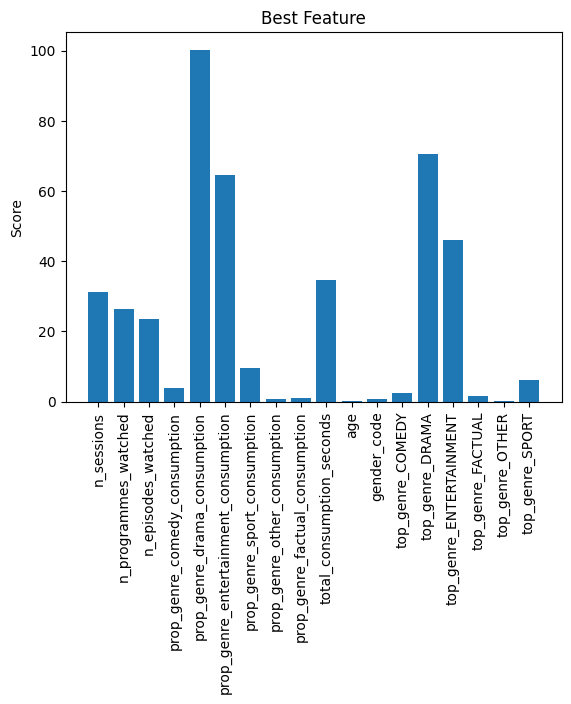

In [558]:
# plot showing the feature with best scores

plt.bar(df_features.columns.values, scores)
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.title('Best Feature')
plt.show()

Now, lets select the best features based on the mean score.

In [552]:
# list to hold the best features
selected_features = []

for i, score in enumerate(scores):

    # if the score is greater than the mean score, select the feature
    if score >= scores.mean():
        selected_features.append(selector.feature_names_in_[i])

In [553]:
selected_features

['n_sessions',
 'n_programmes_watched',
 'prop_genre_drama_consumption',
 'prop_genre_entertainment_consumption',
 'total_consumption_seconds',
 'top_genre_DRAMA',
 'top_genre_ENTERTAINMENT']

### Modeling

Let's split the data into training and testing data.

In [561]:
# function to get training and testing data
def get_dataset(df_features, df_target, test_size=0.25, random_state=20):
  
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=random_state)
  
  # standarize the training data
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)

  return x_train, x_test, y_train, y_test

In [695]:
# get the training and testing data
X_train, X_test, y_train, y_test = get_dataset(df_features, df_target)

Build the models 

In [581]:
# build a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [587]:
# get the predictions for the test data
y_pred = lr_model.predict(X_test)

In [596]:
# get the accuracy of model bassed on the predictions
print(f'>Logistic Regression model has scored an accuracy of {round(accuracy_score(y_test, y_pred)*100)}% on test data')

>Model has scored an accuracy of 80% on test data


In [593]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       194
           1       0.79      0.87      0.83       249

    accuracy                           0.80       443
   macro avg       0.80      0.79      0.79       443
weighted avg       0.80      0.80      0.79       443



In [604]:
# build a decision tree classifier
dtree_model = DecisionTreeClassifier(random_state=1)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [605]:
y_pred = dtree_model.predict(X_test)

In [606]:
# get the accuracy of the model
print(f'>Decision tree model has scored an accuracy of {round(accuracy_score(y_test, y_pred)*100)}% on test data')

>Decision tree model has scored an accuracy of 70% on test data


In [607]:
# display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       194
           1       0.76      0.69      0.72       249

    accuracy                           0.70       443
   macro avg       0.70      0.71      0.70       443
weighted avg       0.71      0.70      0.71       443



In [609]:
X_train.shape

(1326, 18)

In [648]:
# build a neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Flatten())
nn_model.add(Dense(1, activation='sigmoid'))

In [649]:
nn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                1040      
_________________________________________________________________
flatten_3 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [650]:
# compile the neural network model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [651]:
# train the neural networ model
nn_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 0.6466 - accuracy: 0.7081 - val_loss: 0.6063 - val_accuracy: 0.7607
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7662 - val_loss: 0.5603 - val_accuracy: 0.7630
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7707 - val_loss: 0.5328 - val_accuracy: 0.7652
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7662 - val_loss: 0.5131 - val_accuracy: 0.7652
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7745 - val_loss: 0.5015 - val_accuracy: 0.7675
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7783 - val_loss: 0.4960 - val_accuracy: 0.7698
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7843 - val_loss: 0.4944 - val_accuracy: 0.7675
Epoch 8/100


In [652]:
# evaluate the model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

14/14 [==============================] - 0s 558us/step - loss: 0.4490 - accuracy: 0.8059
Accuracy: 0.8058691024780273


In [668]:
# convert data into tensors
X_train = np.expand_dims(df_features.values, -1)
y_train = np.expand_dims(df_target.values, -1)

In [696]:
X_train.shape

(1326, 18)

In [697]:
y_train.shape

(1326,)

In [698]:
X_train.shape[1:]

(18,)

In [715]:
# build a convolutional neural network 
cnn_model = Sequential()

# add the input layer 
#cnn_model.add(InputLayer(input_shape=X_train.shape))
cnn_model.add(Input(shape=X_train.shape[1:]))
cnn_model.add(Conv1D(32, 3, activation='relu'))
# add the hidden layers
cnn_model.add(MaxPool1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
# add the output layer
cnn_model.add(Dense(1, activation='sigmoid'))

ValueError: Input 0 of layer conv1d_23 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 18)

In [712]:
# compile the cnn model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [713]:
# model summary
cnn_model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 1324, 32)          1760      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 662, 32)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 21184)             0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                1355840   
_________________________________________________________________
dense_51 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 17        
Total params: 1,358,657
Trainable params: 1,358,657
Non-trainable params: 0
___________________________________________

In [714]:
# train the model
cnn_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/100


ValueError: in user code:

    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\Mathews\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_39 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 18)
